In [1]:
from weight_shared_analyzer import WeightSharedRun, plot_pareto_curves_ws, get_pareto_curves_df
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [41]:
smallest_subnet = {"d":[0,0,0,0], "e": 0.1}
middle_1_subnet = {"d":[0,1,0,1], "e": 0.14}
middle_2_subnet = {"d":[1,1,1,1], "e": 0.18}
largest_subnet = {"d":[2,2,2,2], "e": 0.25}
pareto_front_repr = [smallest_subnet, middle_1_subnet, middle_2_subnet, largest_subnet]
pareto_mapping = {f"{smallest_subnet}": "smallest",  f"{middle_1_subnet}": "middle-1", f"{middle_2_subnet}": "middle-2", f"{largest_subnet}" : "largest"}
subnet_ordering = ["smallest", "middle-1", "middle-2", "largest"]

In [42]:
fedavg_smallest = WeightSharedRun(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"], pareto_front_repr, pareto_mapping)
fedavg_middle_1 = WeightSharedRun(["flofa/cifar10-cleaned/w2sqaon2", "flofa/cifar10-cleaned/1zpyz46a", "flofa/cifar10-cleaned/sep9wu4x"], pareto_front_repr, pareto_mapping)
fedavg_middle_2 = WeightSharedRun(["flofa/cifar10-cleaned/3hh2dhn3", "flofa/cifar10-cleaned/1ayzkmjw", "flofa/cifar10-cleaned/3kwfm379"], pareto_front_repr, pareto_mapping)
fedavg_largest = WeightSharedRun(["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3", "flofa/cifar10-cleaned/ftc7rokb"], pareto_front_repr, pareto_mapping)

print(fedavg_smallest.name)
print(fedavg_smallest.df["round"].max())

print(fedavg_middle_1.name)
print(fedavg_middle_1.df["round"].max())

print(fedavg_middle_2.name)
print(fedavg_middle_2.df["round"].max())

print(fedavg_largest.name)
print(fedavg_largest.df["round"].max())

alph=100-fedavg-smallest-subnet
1650.0
alph=100-fedavg-small-subnet
1750.0
alph=100-fedavg-middle-subnet
1499.3333333333333
alph=100-fedavg-largest-subnet
1499.0


In [43]:
maxnet = WeightSharedRun(["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], pareto_front_repr, pareto_mapping, name="Maxnet+Tracking+Sandwich")
print(maxnet.name)
print(maxnet.df["round"].max())

Maxnet+Tracking+Sandwich
1650.0


In [44]:
TS = WeightSharedRun(["flofa/cifar10-cleaned/393zn5kh","flofa/cifar10-cleaned/nitt61ry","flofa/cifar10-cleaned/15a9lljk"], pareto_front_repr, pareto_mapping, name="Tracking+Sandwich")
print(TS.name)
print(TS.df["round"].max())



Tracking+Sandwich
1500.0


In [45]:
sandwich = WeightSharedRun(["flofa/cifar10-cleaned/28kmsgaq", "flofa/cifar10-cleaned/144ewb9c", "flofa/cifar10-cleaned/3qywbymq"], pareto_front_repr, pareto_mapping, name="Sandwich")
print(sandwich.name)
print(sandwich.df["round"].max())



Sandwich
1600.0


In [46]:
random = WeightSharedRun(["flofa/cifar10-cleaned/wvbq5byq", "flofa/cifar10-cleaned/2odkw0kg", "flofa/cifar10-cleaned/mpmp3lxm"], pareto_front_repr, pareto_mapping, name="Random")
print(random.name)
print(random.df["round"].max())

Random
1550.0


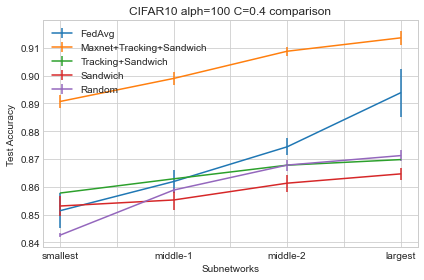

In [47]:
matplotlib.style.use("seaborn-whitegrid")
fedavg_runs = [fedavg_smallest, fedavg_middle_1, fedavg_middle_2,  fedavg_largest]
ws_runs = [maxnet, TS, sandwich, random]
# ws_runs = [TS]


mode="avg"
fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runs, "Test/{model}/Acc", uptil_round=rnum, rename=True, axis=0, name="FedAvg")
ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=rnum, rename=True, mode="largest")
final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
final_df.plot.line(title=f"# Round: {rnum if rnum is not None else 'Max'}", yerr=final_error_df)
plt.xlabel("Subnetworks")
plt.ylabel("Test Accuracy")
plt.title("CIFAR10 alph=100 C=0.4 comparison")
plt.tight_layout()
plt.legend(loc=0)

plt.savefig("cifar10_alph100.pdf")

In [38]:
#CIFAR 10 ALPHA 1
def fedavgCurves(smallest, middle1, middle2, largest):
    fedavg_smallest = WeightSharedRun(smallest, pareto_front_repr, pareto_mapping)
    fedavg_middle_1 = WeightSharedRun(middle1, pareto_front_repr, pareto_mapping)
    fedavg_middle_2 = WeightSharedRun(middle2, pareto_front_repr, pareto_mapping)
    fedavg_largest = WeightSharedRun(largest, pareto_front_repr, pareto_mapping)

    print(fedavg_smallest.name)
    print(fedavg_smallest.df["round"].max())

    print(fedavg_middle_1.name)
    print(fedavg_middle_1.df["round"].max())

    print(fedavg_middle_2.name)
    print(fedavg_middle_2.df["round"].max())

    print(fedavg_largest.name)
    print(fedavg_largest.df["round"].max())
    return [fedavg_smallest, fedavg_middle_1, fedavg_middle_2, fedavg_largest]

fedavg_runs = fedavgCurves(["flofa/cifar10-cleaned/1vuuxb70", "flofa/cifar10-cleaned/1k3afvvl", "flofa/cifar10-cleaned/g97o8xn9"],
                           ["flofa/cifar10-cleaned/1vzldwn3", "flofa/cifar10-cleaned/32iq5inb", "flofa/cifar10-cleaned/291qcx0y"],
                           ["flofa/cifar10-cleaned/2ydg2n5i", "flofa/cifar10-cleaned/wl7fq3id", "flofa/cifar10-cleaned/1mfbpgoa"],
                           ["flofa/cifar10-cleaned/1j9z3d6y", "flofa/cifar10-cleaned/3itxp4ic", "flofa/cifar10-cleaned/2e60ehp0"]
                          )

alph=1-fedavg-smallest-subnet
2550.0
alph=1-fedavg-small-subnet
2000.0
alph=1-fedavg-middle-subnet
1900.0
alph=1-fedavg-largest-subnet
2100.0


In [39]:
maxnet = WeightSharedRun(["flofa/cifar10-cleaned/1ujgbi87", "flofa/cifar10-cleaned/364bxz9r", "flofa/cifar10-cleaned/8ka6r39j"], pareto_front_repr, pareto_mapping, name="Maxnet+Tracking+Sandwich")
print(maxnet.name)
print(maxnet.df["round"].max())

Maxnet+Tracking+Sandwich
1850.0


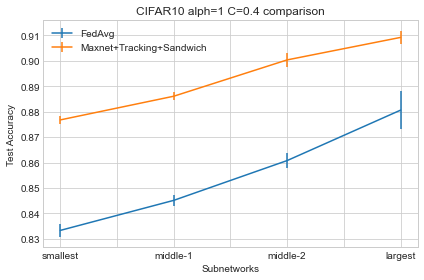

In [40]:
matplotlib.style.use("seaborn-whitegrid")
ws_runs = [maxnet]
# ws_runs = [TS]


mode="avg"
fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runs, "Test/{model}/Acc", uptil_round=1500, rename=True, axis=0, name="FedAvg")
ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=1800, rename=True, mode="largest")
final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
final_df.plot.line(title=f"# Round: {rnum if rnum is not None else 'Max'}", yerr=final_error_df)
plt.xlabel("Subnetworks")
plt.ylabel("Test Accuracy")
plt.title("CIFAR10 alph=1 C=0.4 comparison")
plt.tight_layout()
plt.legend(loc=0)
plt.savefig("cifar10_alph1.pdf")

In [32]:
#alpha 0.1 (need to update rounds)
fedavg_runs0_1 = fedavgCurves(["flofa/cifar10-cleaned/27j50twd", "flofa/cifar10-cleaned/1a7gzyu9", "flofa/cifar10-cleaned/m6k8qjuz"],
                             ["flofa/cifar10-cleaned/23nhaupz", "flofa/cifar10-cleaned/n8vmnxo6", "flofa/cifar10-cleaned/nd3b9qmt"],
                             ["flofa/cifar10-cleaned/30b637qd", "flofa/cifar10-cleaned/2iheisom", "flofa/cifar10-cleaned/2bdp7b7d"],
                             ["flofa/cifar10-cleaned/15c4lbau"])

maxnet0_1 = WeightSharedRun(["flofa/cifar10-cleaned/11egc869", "flofa/cifar10-cleaned/35imasgz", "flofa/cifar10-cleaned/2u0s871u"], pareto_front_repr, pareto_mapping, name="Maxnet")
print(maxnet.name)
print(maxnet.df["round"].max())

alph=0.1-fedavg-smallest-subnet
3600.0
alph=0.1-fedavg-small-subnet
2550.0
alph=0.1-fedavg-middle2-subnet
2500.0
alph=0.1-fedavg-largest-subnet
2600.0
Maxnet
3250.0


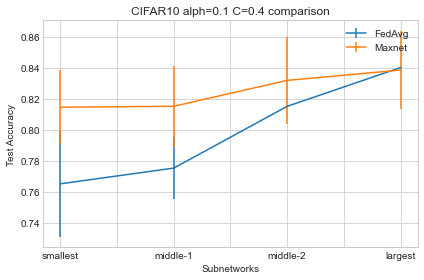

In [36]:
matplotlib.style.use("seaborn-whitegrid")
ws_runs = [maxnet0_1]
# ws_runs = [TS]


mode="avg"
fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runs0_1, "Test/{model}/Acc", uptil_round=2500, rename=True, axis=0, name="FedAvg")
ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=3000, rename=True, mode="largest")
final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
final_df.plot.line(title=f"# Round: {rnum if rnum is not None else 'Max'}", yerr=final_error_df)
plt.xlabel("Subnetworks")
plt.ylabel("Test Accuracy")
plt.title("CIFAR10 alph=0.1 C=0.4 comparison")
plt.tight_layout()
plt.legend(loc=0)
plt.savefig("cifar10_alph0.1.pdf")

In [49]:
#alpha 100 C=0.2
fedavg_runsC0_2 = fedavgCurves(["flofa/cifar10-cleaned/3ouce0tb","flofa/cifar10-cleaned/33mehqjg","flofa/cifar10-cleaned/3v1iijhj"],
                              ["flofa/cifar10-cleaned/gkifku63", "flofa/cifar10-cleaned/2jj4pv27", "flofa/cifar10-cleaned/1v4hi7oo"],
                              ["flofa/cifar10-cleaned/1dg5e6zv", "flofa/cifar10-cleaned/jcc79knd", "flofa/cifar10-cleaned/2x9aq7tn"],
                              ["flofa/cifar10-cleaned/kq86co8r", "flofa/cifar10-cleaned/25q00xtx", "flofa/cifar10-cleaned/2zhvr5sw"])

maxnetC0_2 = WeightSharedRun(["flofa/cifar10-cleaned/14oei8o9","flofa/cifar10-cleaned/lyjoybcg","flofa/cifar10-cleaned/3l433qxb"], pareto_front_repr, pareto_mapping, name="Maxnet")
print(maxnet.name)
print(maxnet.df["round"].max())

C=0.2-alph=100-fedavg-smallest-subnet
2450.0
C=0.2-alph=100-fedavg-middle1-subnet
1900.0
C=0.2-alph=100-fedavg-middle2-subnet
1950.0
C=0.2-alph=100-fedavg-largest-subnet
1550.0
Maxnet+Tracking+Sandwich
1650.0


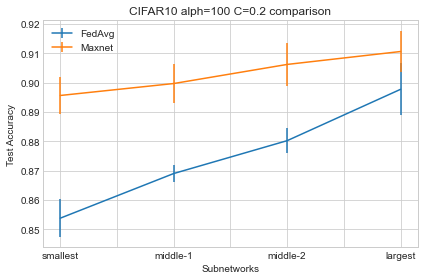

In [52]:
matplotlib.style.use("seaborn-whitegrid")
ws_runs = [maxnetC0_2]
# ws_runs = [TS]


fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runsC0_2, "Test/{model}/Acc", uptil_round=1500, rename=True, axis=0, name="FedAvg")
ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=1500, rename=True, mode="largest")
final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
final_df.plot.line(title=f"# Round: {rnum if rnum is not None else 'Max'}", yerr=final_error_df)
plt.xlabel("Subnetworks")
plt.ylabel("Test Accuracy")
plt.title("CIFAR10 alph=100 C=0.2 comparison")
plt.tight_layout()
plt.legend(loc=0)
plt.savefig("cifar10_alph100_C=0.2.pdf")

In [53]:
#alpha 100 C=0.8
fedavg_runsC0_8 = fedavgCurves(["flofa/cifar10-cleaned/2b9jlvt4"],
                              ["flofa/cifar10-cleaned/1x3ey55q"],
                              ["flofa/cifar10-cleaned/tftsoh1o"],
                              ["flofa/cifar10-cleaned/1i1x31b6"])

maxnetC0_8 = WeightSharedRun(["flofa/cifar10-cleaned/2eayw29s"], pareto_front_repr, pareto_mapping, name="Maxnet")
print(maxnet.name)
print(maxnet.df["round"].max())

C=0.8-alph=100-fedavg-smallest-subnet
1400.0
resumed-C=0.8-alph=100-fedavg-middle1-subnet
1000.0
C=0.8-alph=100-fedavg-middle2-subnet
1050.0
C=0.8-alph=100-fedavg-largest-subnet
1050.0
Maxnet+Tracking+Sandwich
1650.0


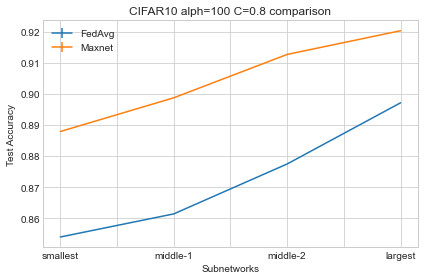

In [54]:
matplotlib.style.use("seaborn-whitegrid")
ws_runs = [maxnetC0_8]
# ws_runs = [TS]


fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runsC0_8, "Test/{model}/Acc", uptil_round=1000, rename=True, axis=0, name="FedAvg")
ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=1000, rename=True, mode="largest")
final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
final_df.plot.line(title=f"# Round: {rnum if rnum is not None else 'Max'}", yerr=final_error_df)
plt.xlabel("Subnetworks")
plt.ylabel("Test Accuracy")
plt.title("CIFAR10 alph=100 C=0.8 comparison")
plt.tight_layout()
plt.legend(loc=0)
plt.savefig("cifar10_alph100_C=0.8.pdf")

In [58]:
#CIFAR100 alpha 100 C=0.4
fedavg_runscifar100 = fedavgCurves(["flofa/cifar100-nobn-wd=0/1flocimf", "flofa/cifar100-nobn-wd=0/12dizuwj", "flofa/cifar100-nobn-wd=0/u2kot722"],
                              ["flofa/cifar100-nobn-wd=0/3mhfsqhi", "flofa/cifar100-nobn-wd=0/5a6kcqph", "flofa/cifar100-nobn-wd=0/to5lixkg"],
                              ["flofa/cifar100-nobn-wd=0/28s0glvb"],
                              ["flofa/cifar100-nobn-wd=0/3izyqo3b"])

maxnetcifar100 = WeightSharedRun(["flofa/cifar100-nobn-wd=0/3skl455a", "flofa/cifar100-nobn-wd=0/1s80x5f7", "flofa/cifar100-nobn-wd=0/f0sjof6q"], pareto_front_repr, pareto_mapping, name="Maxnet")
print(maxnet.name)
print(maxnet.df["round"].max())

alph=100-fedavg-smallest-subnet-wd=1e4
2500.0
alph=100-fedavg-middle1-subnet-wd=1e4
2500.0
alph=100-fedavg-middle2-subnet-wd=1e4
2500.0
alph=100-fedavg-largest-subnet-wd=1e4
3850.0
Maxnet
2150.0


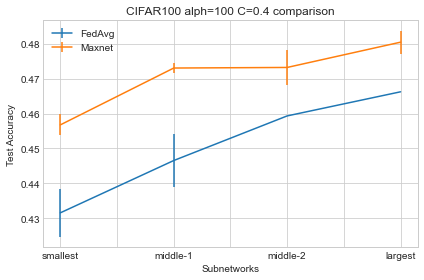

In [60]:
matplotlib.style.use("seaborn-whitegrid")
ws_runs = [maxnetcifar100]
# ws_runs = [TS]


fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runscifar100, "Test/{model}/Acc", uptil_round=2000, rename=True, axis=0, name="FedAvg")
ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=2000, rename=True, mode="largest")
final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
final_df.plot.line(title=f"# Round: {rnum if rnum is not None else 'Max'}", yerr=final_error_df)
plt.xlabel("Subnetworks")
plt.ylabel("Test Accuracy")
plt.title("CIFAR100 alph=100 C=0.4 comparison")
plt.tight_layout()
plt.legend(loc=0)
plt.savefig("cifar100_alph100_C=0.4.pdf")

In [ ]:
lalala = WeightSharedRun("flofa/cifar10-cleaned/1956egfp", pareto_front_repr, pareto_mapping)
lalala.metric("Test/{model}/Acc").get_best_pareto_curve()

In [ ]:
fedavg_largest = WeightSharedRun(["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3"], pareto_front_repr, pareto_mapping)

In [ ]:
fedavg_largest.metric("Test/{model}/Acc").get_best_pareto_curve()

In [ ]:
fedavg_largest_1 = WeightSharedRun("flofa/cifar10-cleaned/1956egfp", pareto_front_repr, pareto_mapping)
fedavg_largest_2 = WeightSharedRun("flofa/cifar10-cleaned/3bafwyp3", pareto_front_repr, pareto_mapping)




In [ ]:
xxx = pd.concat([fedavg_largest_1.df])
xxx

In [ ]:
gp_xxx_fedavg = xxx.groupby(xxx.index)

In [ ]:
gp_xxx_fedavg

In [ ]:
gp_xxx_fedavg.mean()

In [ ]:
gp_xxx_fedavg.std().fillna(0)

In [ ]:
concat_fedavg = pd.concat([fedavg_largest_1.df, fedavg_largest_2.df])
concat_fedavg

In [ ]:
gp_fedavg = concat_fedavg.groupby(concat_fedavg.index)

In [ ]:
gp_fedavg.mean()

In [ ]:
gp_fedavg.std().fillna(0)

In [ ]:
fedavg_largest_1.df

In [ ]:
fedavg_largest_2.df

In [ ]:
test_acc_df1 = fedavg_largest_1.metric("Test/{model}/Acc")
test_acc_df2 = fedavg_largest_2.metric("Test/{model}/Acc")

In [ ]:
a = test_acc_df1.get_best_pareto_curve()

In [ ]:
b = test_acc_df2.get_best_pareto_curve()

In [ ]:
x = pd.concat([a,b])
x

In [ ]:
x.mean(), x.std()